In [1]:
import inspect
import numpy as np
import pandas

def list_size(variable, callers_local_vars):
    list_size_recursive(' # ', variable, callers_local_vars)

def list_size_recursive(header, variable, callers_local_vars):
    if type(variable) == list or type(variable) == pandas.core.series.Series:
        print(header, 'len(', str([k for k, v in callers_local_vars if v is variable][0]), ') = ', len(variable), sep='')
        if(len(variable) > 0):
            header += '  '
            list_size_recursive(header, variable[0], callers_local_vars)

def nparray_size(variable, callers_local_vars):
    if(type(variable) == np.ndarray):
        print(' # ', str([k for k, v in callers_local_vars if v is variable][0]), '.shape = ', variable.shape, sep='')

def see(variable, all=0):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    print('# ', str([k for k, v in callers_local_vars if v is variable][0]), ' (', type(variable), ')', sep='', end='')
    if all or (type(variable) != list and type(variable) != np.ndarray and type(variable) != pandas.core.series.Series):
        print(' = ', variable, sep='')
    else:
        print('')
    list_size(variable, callers_local_vars)
    nparray_size(variable, callers_local_vars)


In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

attrNames = ["sepal length", "sepal width", "petal length", "petal width"]

dataList = []
classLabelsList = []
f = open('iris.data', 'r')
for line in f:
    line = line.rstrip()
    elems = line.split(',')
    if len(elems) > 1:
        dataList.append(elems[:-1])
        classLabelsList.append(elems[-1])
f.close()

x = np.float_(np.array(dataList))

# convert y to one hot
labels = np.unique(classLabelsList)

def label2onehot(label):
    return np.array([1 if label == elem else 0 for elem in labels])

y = np.array([label2onehot(label) for label in classLabelsList])

In [178]:
import numpy as np

def softmax(a):
    normalizer = np.sum(np.exp(a), axis=1)
    return np.array([exp_a / normalizer for exp_a in np.exp(a).transpose()]).transpose()

def softmax_nn(x_with_bias, W):
    return softmax(np.matmul(W, x_with_bias.transpose()).transpose())

In [179]:
def grad(x_with_bias, y, W):
    error = softmax_nn(x_with_bias, W) - y
    return np.matmul(error.transpose(), x_with_bias) / x_with_bias.shape[0]

In [190]:
def update(x_with_bias, y, W, learning_rate):
    g = grad(x_with_bias, y, W)
    delta_W = - learning_rate * g
    return W + delta_W

In [195]:
def train(x, y, learning_rate, iterNum):    
    x_with_bias = np.c_[x, np.ones(x.shape[0])]
    W = np.random.random((y.shape[1], x_with_bias.shape[1]))
    loss_dynamics = []
    for _ in range(iterNum):
        W = update(x_with_bias, y, W, learning_rate)
        loss = - np.sum(y * np.log(softmax_nn(x_with_bias, W)))
        loss_dynamics.append(loss)
    return W, loss_dynamics

In [199]:
learning_rate = 0.1
iterNum = 500
trained_W, loss_dynamics = train(x, y, learning_rate, iterNum)

In [200]:
x_with_bias = np.c_[x, np.ones(x.shape[0])]
np.argmax(softmax_nn(x_with_bias, trained_W), axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

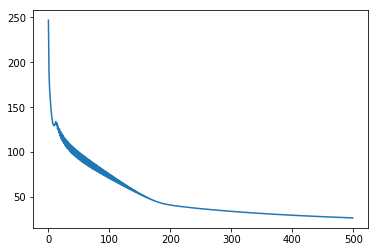

In [201]:
plt.plot(loss_dynamics)